## 🏡 **Housing Market Price Prediction Model based on Redfin Housing Market CSV (Northeast Region)**
### 📊 A Machine Learning Approach for Real Estate Price Prediction

---

## ✨ **Introduction**
Accurate forecasting of future real estate prices is an extremely crucial factor to private real estate investors when deciding between which real estate properties they should invest in that would give them the highest ROI (Return on Investment). A little context, I chose to work on a Housing Prediction Model primarily for my dad who is an avid investor in Real Estate properties, so I wanted to create a tool that could potentially give him insight on which properties would be the best investment considering all factors that he would've otherwise never have taken into account for. This also expedites a lot of the research considering how it's quite a lengthy process to have to research into various factors that could potentially affect the price in a specific property.

---

## 🔍 **Project Overview**
### **1️⃣ Data Preprocessing & Cleaning**
- 📌 **Handling Missing Values:** Applied different imputation strategies (mode, median, zero filling).
- 🗄️ **Feature Selection:** Dropped high-missing and redundant columns.
- 🔗 **Merging Datasets:** Combined property details with historical transaction data.

### **2️⃣ Exploratory Data Analysis**
- 📊 **Dataset Structure:** Identified variable types and distributions.
- 📉 **Missing Data Visualization:** Analyzed missing value patterns.
- 📈 **Logerror Trends:** Explored historical Zestimate errors to detect biases.

### **3️⃣ Model Training & Evaluation**
- ⚖ **Baseline Models:** Trained **Linear Regression** and **XGBoost Regressor**.
- 🔬 **Hyperparameter Tuning:** Used **RandomizedSearchCV** for optimization.
- 🎯 **Performance Evaluation:** Compared models using **Mean Absolute Error (MAE)**.

### **4️⃣ Final Predictions & Findings**
- 🏡 **Generating Predictions:** Forecasted logerror values for given months in **2016 and 2017**.
- 📄 **Submission File Creation:** Ensured proper format for Kaggle submission.

---

### 🚀 **Goal**
This end-to-end pipeline refines my models predictive capabilities by integrating robust preprocessing, feature engineering, and model optimization, ultimately enhancing real estate price predictions.

---


## Library Import & Data Loading & Dataset Overview

Importing essential libraries for numerical computations, data handling, and visualization. Then afterwards ensuring the loading of the datasets, and because of the similarities of the two datasets, they can be merged together, to create an ease of access and overall model training.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Listing all of the Northeast regions state abbreviations
northeast_states = ['MA', 'NH', 'VT', 'ME', 'RI', 'CT', 'NY', 'NJ', 'PA']

# Directory that is linking all of the Northeast region CSV files
data_dir = "Redfin/united-states-redfin-housing-market-csv/versions/1/"

# Next we find all the CSV files for northeast states
csv_files = [f for f in os.listdir(data_dir) if (f.startswith(tuple(state + '-')) for state in northeast_states) and f.endswith('.csv')]

#Read and merge all DataFrames in the Northeast region
dfs = [pd.read_csv(os.path.join(data_dir, f)) for f in csv_files]
merged_northeast_df = pd.concat(dfs, ignore_index = False)

print("Merged all Northeast state files")
print("Data successfully loaded!")

merged_northeast_df

Merged all Northeast state files
Data successfully loaded!


,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,"In accordance with local MLS rules, some MLS l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MLS Listing,NaN,Condo/Co-op,804 W 10th Ave #2,Anchorage,AK,99501.0,899900.0,3.0,3.50,Anchorage Municipality,2015.0,NaN,2017.0,1.0,447.0,450.0,Active,NaN,NaN,https://www.redfin.com/AK/Anchorage/804-W-10th...,AKMLS,25-9103,N,Y,61.212620,-149.897905
2,MLS Listing,NaN,Multi-Family (2-4 Unit),4406 Parsons Ave,Anchorage,AK,99508.0,520000.0,8.0,4.00,Anchorage Municipality,4056.0,12500.0,1983.0,1.0,128.0,NaN,Active,NaN,NaN,https://www.redfin.com/AK/Anchorage/4406-Parso...,AKMLS,25-9810,N,Y,61.229449,-149.798621
3,MLS Listing,NaN,Multi-Family (2-4 Unit),808 N Flower St,Anchorage,AK,99508.0,540000.0,9.0,4.00,Anchorage Municipality,3840.0,6098.0,1984.0,1.0,141.0,NaN,Active,NaN,NaN,https://www.redfin.com/AK/Anchorage/808-N-Flow...,AKMLS,25-9809,N,Y,61.230671,-149.807047
4,MLS Listing,NaN,Condo/Co-op,4355 Constellation Ave #23,Anchorage,AK,99517.0,275000.0,2.0,2.00,Anchorage Municipality,864.0,NaN,1985.0,1.0,318.0,432.0,Active,NaN,NaN,https://www.redfin.com/AK/Anchorage/4355-Const...,AKMLS,25-9807,N,Y,61.181502,-149.949318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,MLS Listing,NaN,Single Family Residential,6507 Riverside Ter,Casper,WY,82604.0,318000.0,4.0,1.75,RED BUTTE VILLAGE 1 RESUB TRAIL,1644.0,18731.0,1964.0,598.0,193.0,NaN,Active,NaN,NaN,https://www.redfin.com/WY/Casper/6507-W-Rivers...,WMLS,20234493,N,Y,42.808348,-106.420500
317,MLS Listing,NaN,Vacant Land,TR 207,Casper,WY,82601.0,35000.0,NaN,NaN,NO SUBDIVISION,NaN,40000.0,NaN,651.0,NaN,375.0,Active,NaN,NaN,https://www.redfin.com/WY/Casper/Tr-207-Unknow...,WMLS,20233770,N,Y,43.046900,-106.238400
318,MLS Listing,NaN,Single Family Residential,1088 Cornwall,Casper,WY,82609.0,735000.0,5.0,3.00,BLACKMORE VISTA ADDITION NO 2,3680.0,11326.0,2019.0,661.0,200.0,120.0,Active,NaN,NaN,https://www.redfin.com/WY/Casper/1088-Cornwall...,WMLS,20192069,N,Y,42.837100,-106.256581
319,MLS Listing,NaN,Single Family Residential,3542 Barry Ct,Casper,WY,82609.0,299900.0,3.0,2.00,COTTONWOOD,2117.0,NaN,2019.0,661.0,142.0,NaN,Active,NaN,NaN,https://www.redfin.com/WY/Casper/3542-Barry-Ct...,WMLS,20191609,N,Y,42.812778,-106.422520


## Data Exploration Function

Defining a function to explore datasets (in our scenario it's just one combined dataset) by:
- Printing basic information (shape, column types).
- Identifying missing values and visualizing their percentage.
- Displaying the distribution of numerical features.

Executing this function on the **merged northeast dataframe** to analyze its structure and missing data.

In [89]:
def explore_data(df, name):
    """
    Explore the specified dataframe
    param df: Dataframe that you'd like to explore
    param name: What you'd like to refer to this particular dataframe as
    return: Information and plots
    """
    
    print(f"Exploring dataset {name}")
    print('-' * 50)

    # General info
    print(f"Shape: {df.shape}")
    print("\nColumns & Data Types")
    print(df.dtypes.value_counts())

    # Missing values analysis
    missing_percent_col = df.isnull().mean() * 100
    missing_percent = missing_percent_col[missing_percent_col > 0].sort_values(ascending = False)

    if not missing_percent.empty:
        print("\nMissing Values (%):\n")
        print(missing_percent)


        plt.figure(figsize=(10, 10))
        sns.barplot(x = missing_percent.index, y = missing_percent.values)
        plt.xticks(rotation = 90)
        plt.ylabel("Missing Values (%)")
        plt.xlabel("Columns")
        plt.title(f"Missing Data in {name}")
        plt.show()


Exploring dataset Merged Northeast DataFrame
--------------------------------------------------
Shape: (28130, 27)

Columns & Data Types
object     15
float64    12
Name: count, dtype: int64

Missing Values (%):

SOLD DATE                                                                                      100.000000
NEXT OPEN HOUSE START TIME                                                                      83.608247
NEXT OPEN HOUSE END TIME                                                                        83.608247
HOA/MONTH                                                                                       62.449342
LOT SIZE                                                                                        13.345183
SQUARE FEET                                                                                     10.277284
$/SQUARE FEET                                                                                    9.431212
YEAR BUILT                                   

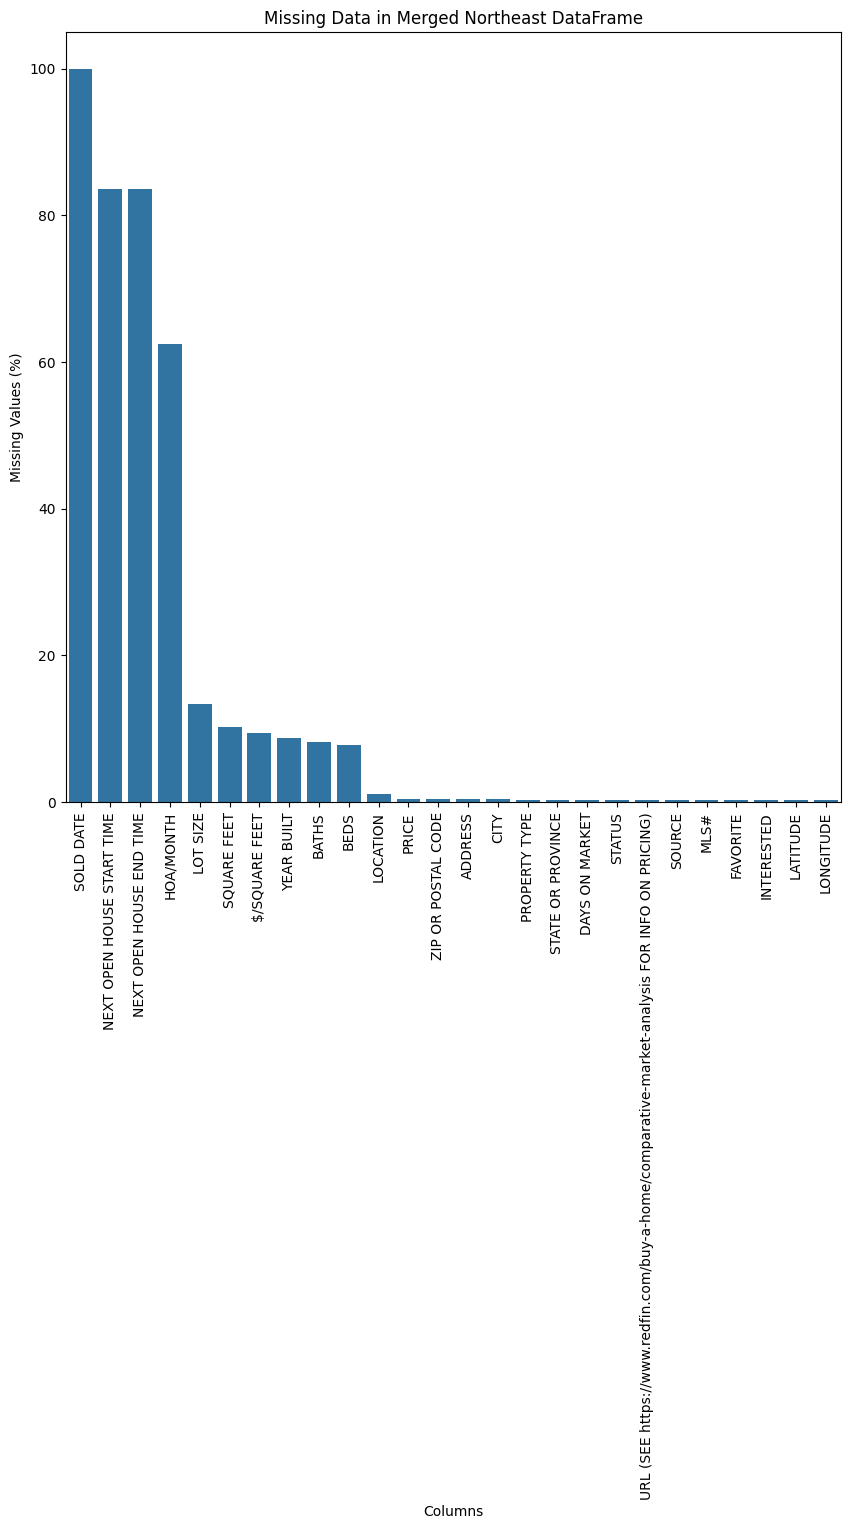

In [90]:
explore_data(merged_northeast_df, "Merged Northeast DataFrame")

## Handling Missing Data

Defining a function to drop columns that have more than **80% missing values** ensuring an overall cleaner dataset. Applying this function to the **Merged Northeast Dataframe**, and then displaying their updated shapes.

In [91]:
# Function to drop columns with high missing values
def drop_high_missing_cols(df, name, threshold = 0.8):
    """
    Drops columns with missing values above a certain threshold.
    :param df: DataFrame to process
    :param name: Name of the dataset for printing
    :param threshold: Proportion of missing values to decide column removal
    :return: Cleaned DataFrame
    """

    missing_percent = df.isnull().mean()
    cols_to_drop = missing_percent[missing_percent > threshold].index.tolist()

    print(f"Dropping {len(cols_to_drop)} columns from {name}, (greater than {threshold * 100}% missing values)")

    return df.drop(columns = cols_to_drop)

merged_northeast_df = drop_high_missing_cols(merged_northeast_df, "Merged Northeast Dataframe")

print(f"New shape of Merged Northeast Dataframe: {merged_northeast_df.shape}")


Dropping 3 columns from Merged Northeast Dataframe, (greater than 80.0% missing values)
New shape of Merged Northeast Dataframe: (28130, 24)


In [92]:
merged_northeast_df.dtypes

SALE TYPE                                                                                       object
PROPERTY TYPE                                                                                   object
ADDRESS                                                                                         object
CITY                                                                                            object
STATE OR PROVINCE                                                                               object
ZIP OR POSTAL CODE                                                                              object
PRICE                                                                                          float64
BEDS                                                                                           float64
BATHS                                                                                          float64
LOCATION                                                                 

## Variable Type Analysis
Defining a function to analyze the types of variables in a dataset by:

- Counting numerical, categorical, and other types
- Displaying the distribution of variable types in a bar chart

Executing this in order to get a good understanding of the dataset's variable types.

In [93]:
def analyze_variable_types(df, name):
    """
    Analyzes the types of variables in the dataset.
    - Counts numerical, categorical, and other types of variables.
    """

    print(f"Analyzing Variable Types in {name}")
    print('-' * 50)

    var_types = df.dtypes.value_counts()
    print(df.dtypes)
    print(var_types)

    plt.figure(figsize = (8, 5))
    var_types.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')
    plt.title(f"Variable Type Distribution in {name}")
    plt.xlabel("Data Type")
    plt.ylabel("Count")
    plt.xticks(rotation = 45)
    plt.show()

Analyzing Variable Types in Merged Northeast Dataframe
--------------------------------------------------
SALE TYPE                                                                                       object
PROPERTY TYPE                                                                                   object
ADDRESS                                                                                         object
CITY                                                                                            object
STATE OR PROVINCE                                                                               object
ZIP OR POSTAL CODE                                                                              object
PRICE                                                                                          float64
BEDS                                                                                           float64
BATHS                                                                 

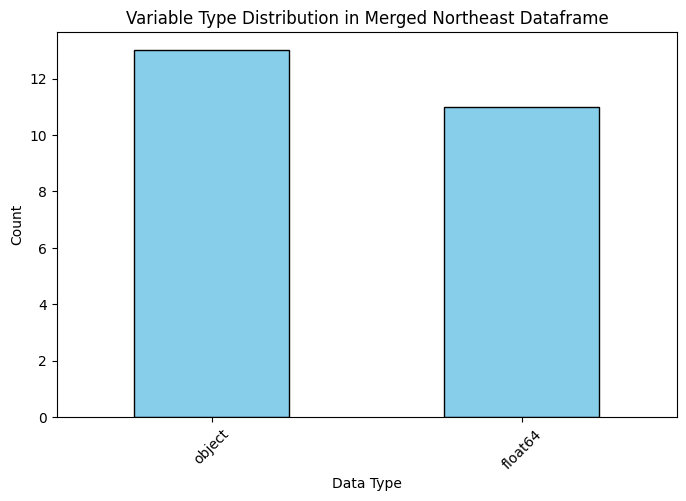

,SALE TYPE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,"In accordance with local MLS rules, some MLS l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MLS Listing,Condo/Co-op,804 W 10th Ave #2,Anchorage,AK,99501.0,899900.0,3.0,3.5,Anchorage Municipality,2015.0,NaN,2017.0,1.0,447.0,450.0,Active,https://www.redfin.com/AK/Anchorage/804-W-10th...,AKMLS,25-9103,N,Y,61.212620,-149.897905
2,MLS Listing,Multi-Family (2-4 Unit),4406 Parsons Ave,Anchorage,AK,99508.0,520000.0,8.0,4.0,Anchorage Municipality,4056.0,12500.0,1983.0,1.0,128.0,NaN,Active,https://www.redfin.com/AK/Anchorage/4406-Parso...,AKMLS,25-9810,N,Y,61.229449,-149.798621
3,MLS Listing,Multi-Family (2-4 Unit),808 N Flower St,Anchorage,AK,99508.0,540000.0,9.0,4.0,Anchorage Municipality,3840.0,6098.0,1984.0,1.0,141.0,NaN,Active,https://www.redfin.com/AK/Anchorage/808-N-Flow...,AKMLS,25-9809,N,Y,61.230671,-149.807047
4,MLS Listing,Condo/Co-op,4355 Constellation Ave #23,Anchorage,AK,99517.0,275000.0,2.0,2.0,Anchorage Municipality,864.0,NaN,1985.0,1.0,318.0,432.0,Active,https://www.redfin.com/AK/Anchorage/4355-Const...,AKMLS,25-9807,N,Y,61.181502,-149.949318
5,MLS Listing,Condo/Co-op,2819 Malibu Meadows Way Unit B1,Anchorage,AK,99517.0,289900.0,2.0,1.5,Anchorage Municipality,1090.0,NaN,2004.0,1.0,266.0,294.0,Active,https://www.redfin.com/AK/Anchorage/2819-Malib...,AKMLS,25-9799,N,Y,61.175511,-149.936407
6,MLS Listing,Condo/Co-op,11351 Discovery View Dr #103,Anchorage,AK,99515.0,365000.0,2.0,2.0,Anchorage Municipality,1120.0,NaN,2006.0,1.0,326.0,512.0,Active,https://www.redfin.com/AK/Anchorage/11351-Disc...,AKMLS,25-9797,N,Y,61.119038,-149.929663
7,MLS Listing,Single Family Residential,8210 Sundi Dr,Anchorage,AK,99502.0,655000.0,3.0,2.5,Anchorage Municipality,3721.0,43475.0,1971.0,1.0,176.0,NaN,Active,https://www.redfin.com/AK/Anchorage/8210-Sundi...,AKMLS,25-9746,N,Y,61.146236,-149.973011
8,MLS Listing,Single Family Residential,20104 Highland Ridge Dr,Eagle River,AK,99577.0,629000.0,5.0,3.5,Anchorage Municipality,2986.0,5750.0,2003.0,1.0,211.0,48.0,Active,https://www.redfin.com/AK/Eagle-River/20104-Hi...,AKMLS,25-9190,N,Y,61.302715,-149.507456
9,MLS Listing,Single Family Residential,3910 Image Dr,Anchorage,AK,99504.0,419900.0,3.0,2.0,Anchorage Municipality,1707.0,4792.0,1992.0,1.0,246.0,NaN,Active,https://www.redfin.com/AK/Anchorage/3910-Image...,AKMLS,25-9647,N,Y,61.185113,-149.771507


In [94]:
analyze_variable_types(merged_northeast_df, "Merged Northeast Dataframe")
merged_northeast_df.columns
merged_northeast_df.head(10)

## Dropping Unnecessary Columns

Removing selected columns from the **Merged Northeast Dataframe** to reduce noise and focus on relevant features. The `errors="ignore"` option ensures that non-existent columns do not cause errors.
- Haven't learned feature engineering yet, so for now, it's primarily just eye-balling and seeing which 
- Also dropping rows which don't have a price value in it

In [95]:
def unique_value_per_column(df, name):
    for col in df.columns:
        unique_count = df[col].nunique()
        dtype = df[col].dtype
        print(f"{col}: {unique_count} unique values | dtype: {dtype}")

unique_value_per_column(merged_northeast_df, "Merged Northeast Dataframe")


drop_cols = ["ADDRESS", "LOCATION", "LATITUDE", "LONGITUDE", "INTERESTED", "FAVORITE", "MLS#", "URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)", "ZIP OR POSTAL CODE"]
merged_northeast_df_cleaned = merged_northeast_df.drop(columns = drop_cols, errors = 'ignore')

merged_northeast_df_cleaned = merged_northeast_df_cleaned.dropna(subset = ["PRICE"])

SALE TYPE: 6 unique values | dtype: object
PROPERTY TYPE: 12 unique values | dtype: object
ADDRESS: 27276 unique values | dtype: object
CITY: 632 unique values | dtype: object
STATE OR PROVINCE: 41 unique values | dtype: object
ZIP OR POSTAL CODE: 2024 unique values | dtype: object
PRICE: 3928 unique values | dtype: float64
BEDS: 43 unique values | dtype: float64
BATHS: 52 unique values | dtype: float64
LOCATION: 11581 unique values | dtype: object
SQUARE FEET: 4498 unique values | dtype: float64
LOT SIZE: 7017 unique values | dtype: float64
YEAR BUILT: 195 unique values | dtype: float64
DAYS ON MARKET: 389 unique values | dtype: float64
$/SQUARE FEET: 1466 unique values | dtype: float64
HOA/MONTH: 1439 unique values | dtype: float64
STATUS: 2 unique values | dtype: object
URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING): 27323 unique values | dtype: object
SOURCE: 125 unique values | dtype: object
MLS#: 27305 unique values | dtype: object
FAV

Exploring dataset Cleaned Northeast Dataframe dropping insignificant features
--------------------------------------------------
Shape: (28000, 15)

Columns & Data Types
float64    9
object     6
Name: count, dtype: int64

Missing Values (%):

HOA/MONTH        62.285714
LOT SIZE         13.089286
SQUARE FEET      10.000000
$/SQUARE FEET     9.010714
YEAR BUILT        8.439286
BATHS             7.925000
BEDS              7.489286
CITY              0.064286
dtype: float64


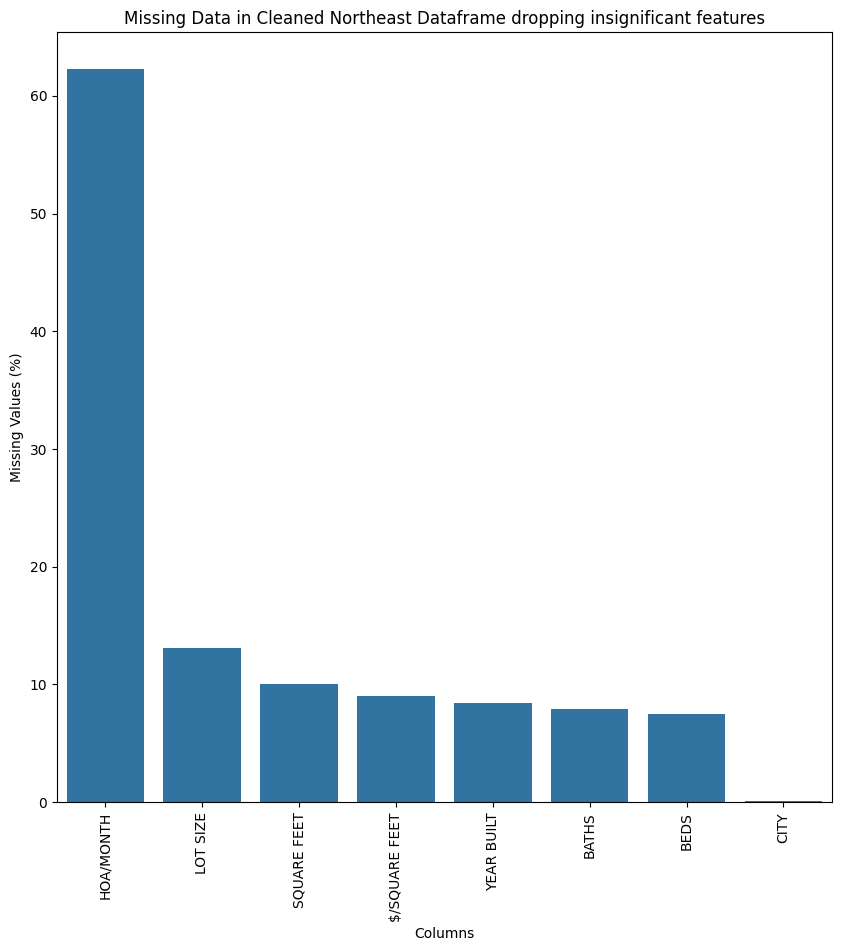

Index(['SALE TYPE', 'PROPERTY TYPE', 'CITY', 'STATE OR PROVINCE', 'PRICE',
       'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'SOURCE'],
      dtype='object')


In [96]:
merged_northeast_df_cleaned.head(10)

explore_data(merged_northeast_df_cleaned, "Cleaned Northeast Dataframe dropping insignificant features")

print(merged_northeast_df_cleaned.columns)

## Handling Missing Values

Filling missing values using different strategies:
- **Mode (most frequent value):** For categorical and regional identifiers.
- **Median:** For numerical features like square footage, year built, and tax amount.
- **Zero:** For features where missing values indicate absence (e.g., number of stories, garage count).

Applying these strategies to **Merged Northeast Dataframe** to ensure consistency.

---

## Future Plans (TBD)
Utilizing some kind of model that is capable of imputing better values dependent on each columns data rather than trying to generically categorize things and imputing the mode, median, mean, or constant

In [97]:
# Define the replacement stratergies
fill_mode = [
    "CITY"
]

fill_median = [
    "LOT SIZE", "SQUARE FEET", "$/SQUARE FEET", "YEAR BUILT", "BATHS", "BEDS", 
]

fill_zero = [
    "HOA/MONTH"
]

for col in fill_mode:
    merged_northeast_df_cleaned[col] = merged_northeast_df_cleaned[col].fillna(merged_northeast_df_cleaned[col].mode()[0])

for col in fill_median:
    merged_northeast_df_cleaned[col] = merged_northeast_df_cleaned[col].fillna(merged_northeast_df_cleaned[col].median())

for col in fill_zero:
    merged_northeast_df_cleaned[col] = merged_northeast_df_cleaned[col].fillna(0)



In [107]:
# Check to see that all columns now don't possess any missing values
# for col in merged_northeast_df_cleaned.columns:
#     print(f"{col} has NaN values: {merged_northeast_df_cleaned[col].isnull().any()}")

# Listing the Final Dataset Columns
def list_columns(df, name):
    """
    Prints all columns in the dataset along with their data types.
    """
    print(f"\n Columns in {name}:")
    print("-" * 50)
    print(df.dtypes)
    print("\nTotal columns:", df.shape[1])

def unique_value_per_column(df, name):
    print(name)
    print("-" * 50)
    for col in df.columns:
        unique_count = df[col].nunique()
        dtype = df[col].dtype
        if (dtype == 'object'):
            print(f"{col}: {unique_count} unique values | dtype: {dtype}")

unique_value_per_column(merged_northeast_df_cleaned, "Merged Northeast Dataframe")

Merged Northeast Dataframe
--------------------------------------------------
SALE TYPE: 5 unique values | dtype: object
PROPERTY TYPE: 12 unique values | dtype: object
CITY: 632 unique values | dtype: object
STATE OR PROVINCE: 41 unique values | dtype: object
STATUS: 2 unique values | dtype: object
SOURCE: 125 unique values | dtype: object


## Categorical Variables
- Change categorical variables into numerical form, and I'm going to use a combination of
    - Ordinal Encoding: For things that have an apparent ordering **(low, medium, high)** to them, and also ensure that it is safe to ordinal encode ***wouldn't work in this scenario***
    - One Hot Encoding: For relatively low cardinality, but primarily for object values that have no inherent ordering **works**
    - K-Fold Target Encoding: Works in the sense that it calculates the possibility of each value by breaking up the values initially and then 

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from category_encoders import TargetEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# Define the columns that'll be used for each kind of encoding
ordinal_cols = []
onehot_cols = ["SALE TYPE", "PROPERTY TYPE", "STATUS"]
target_cols = ["CITY", "STATE OR PROVINCE", "SOURCE"]

# Define X and y variables and their respective columns and split data
X = merged_northeast_df_cleaned.drop(columns=["PRICE"])
y = merged_northeast_df_cleaned["PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 42)

# Create backup copies for safety
X_train_original = X_train.copy()
X_test_original = X_test.copy()
y_train_original = y_train.copy()
y_test_original = y_test.copy()

# Create working copies for encoding
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

print("Starting encoding process...")

# 1. One-hot encoding for low cardinality columns
print("Applying one-hot encoding...")
X_train_encoded = pd.get_dummies(X_train_encoded, columns=onehot_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_encoded, columns=onehot_cols, drop_first=True)

# 2. K-fold target encoding for high cardinality columns
print("Applying target encoding...")
te = TargetEncoder(cols = target_cols, smoothing = 0.3)
X_train_encoded[target_cols] = te.fit_transform(X_train_encoded[target_cols], y_train)
X_test_encoded[target_cols] = te.transform(X_test_encoded[target_cols])


# Align columns between train and test (in case some categories are missing in test)
print("Aligning columns...")
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

print("Encoding complete!")
print(f"Original shape: {X_train.shape}")
print(f"Encoded shape: {X_train_encoded.shape}")

# If something goes wrong, you can always reset to original:
# X_train = X_train_original.copy()
# X_test = X_test_original.copy()

# Update our main training and test sets
X_train = X_train_encoded
X_test = X_test_encoded

Starting encoding process...
Applying one-hot encoding...
Applying target encoding...
Aligning columns...
Encoding complete!
Original shape: (22400, 14)
Encoded shape: (22400, 27)


In [160]:
# Check original categories for each feature
print("Original categories before encoding:")
print("-" * 50)
for col in onehot_cols:
    print(f"\n{col} unique values:")
    print(X_train_original[col].unique())
    print(f"Total categories: {X_train_original[col].nunique()}")

print("\nEncoded columns after one-hot encoding:")
print("-" * 50)
for col in onehot_cols:
    encoded_cols = [c for c in X_train.columns if c.startswith(col)]
    print(f"\n{col} encoded columns:")
    print(encoded_cols)
    print(f"Total encoded columns: {len(encoded_cols)}")
    
# Verify the encoding is working correctly by checking a few rows
print("\nSample verification:")
print("-" * 50)
sample_idx = X_train_original.index[0]  # Get first row
for col in onehot_cols:
    original_value = X_train_original.loc[sample_idx, col]
    encoded_cols = [c for c in X_train.columns if c.startswith(col)]
    encoded_values = X_train.loc[sample_idx, encoded_cols]
    print(f"\n{col}:")
    print(f"Original value: {original_value}")
    print(f"Encoded values: {encoded_values}")

# Check target encoded columns
print("\nTarget encoded columns summary:")
print("-" * 50)
print(X_train[target_cols].describe())

Original categories before encoding:
--------------------------------------------------

SALE TYPE unique values:
['MLS Listing' 'New Construction Plan' 'Redfin Data'
 'New Construction Home' 'For-Sale-by-Owner Listing']
Total categories: 5

PROPERTY TYPE unique values:
['Condo/Co-op' 'Single Family Residential' 'Townhouse' 'Vacant Land'
 'Multi-Family (2-4 Unit)' 'Mobile/Manufactured Home' 'Ranch'
 'Multi-Family (5+ Unit)' 'Other' 'Unknown' 'Parking' 'Moorage']
Total categories: 12

STATUS unique values:
['Active' 'Pre On-Market']
Total categories: 2

Encoded columns after one-hot encoding:
--------------------------------------------------

SALE TYPE encoded columns:
['SALE TYPE_MLS Listing', 'SALE TYPE_New Construction Home', 'SALE TYPE_New Construction Plan', 'SALE TYPE_Redfin Data']
Total encoded columns: 4

PROPERTY TYPE encoded columns:
['PROPERTY TYPE_Mobile/Manufactured Home', 'PROPERTY TYPE_Moorage', 'PROPERTY TYPE_Multi-Family (2-4 Unit)', 'PROPERTY TYPE_Multi-Family (5+ Uni

## Model Training & Evaluation
- LinearRegression: Base line model and good for benchmarking
- RandomForest: better model primarily used to see if it outperforms the LinearRegression model
- XGBoost: Most likely the best model that we'll use, good for capturing complex relationships, and we're going to also find the best parameters for the XGBoost model

Starting hyperparameter tuning...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters found:
{'bootstrap': True, 'max_depth': 96, 'max_features': None, 'max_leaf_nodes': 84, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 459}

Best MAE score found:
108414.48884845295

Best parameters found:
{'bootstrap': True, 'max_depth': 96, 'max_features': None, 'max_leaf_nodes': 84, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 459}

Best MAE score found:
108414.48884845295

Test set MAE with best model: $85,859.48

Test set MAE with best model: $85,859.48


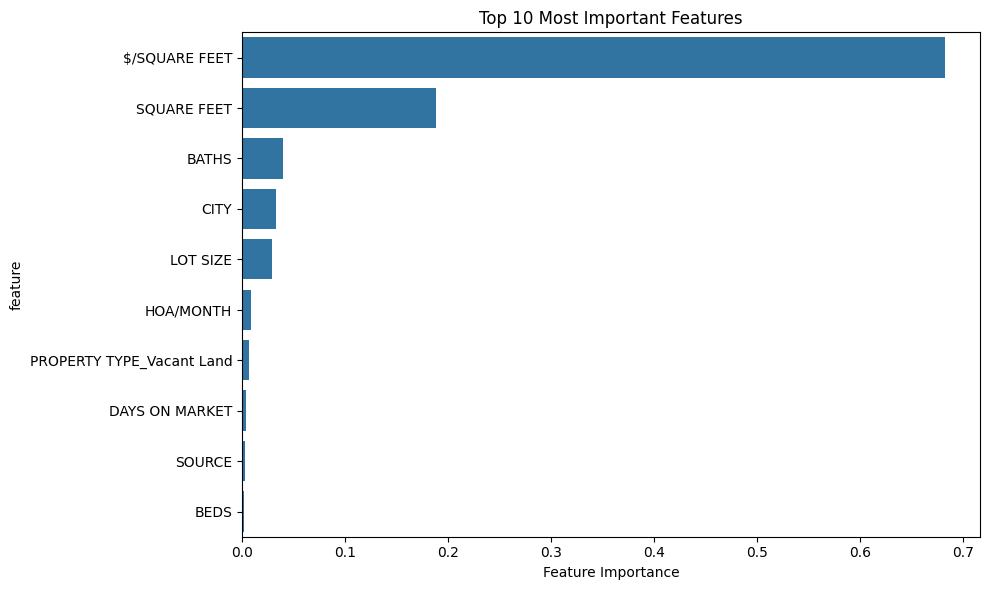

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Apply Standard Scaler because we're using LinearRegression (a base model)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for RandomForest
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],  # removed 'auto' as it's not valid anymore
    'max_leaf_nodes': randint(10, 100),
    'bootstrap': [True, False]
}

# Create base model
rf = RandomForestRegressor(random_state=42)  # removed fixed parameters to allow full search

# Create RandomizedSearchCV object
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=100,  # number of parameter settings that are sampled
    cv=5,        # 5-fold cross-validation
    random_state=42,
    n_jobs=-1,   # use all processors
    verbose=2,
    scoring='neg_mean_absolute_error'  # using MAE as our metric
)

# Fit RandomizedSearchCV
print("Starting hyperparameter tuning...")
rf_random.fit(X_train_scaled, y_train)

# Print results
print("\nBest parameters found:")
print(rf_random.best_params_)
print("\nBest MAE score found:")
print(-rf_random.best_score_)  # negative because sklearn minimizes

# Use the best model for predictions
best_rf = rf_random.best_estimator_
rf_preds = best_rf.predict(X_test_scaled)
rf_mae = mean_absolute_error(y_test, rf_preds)
print(f"\nTest set MAE with best model: ${rf_mae:,.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
})

feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

Starting XGBoost hyperparameter tuning...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters found:
{'colsample_bytree': np.float64(0.9498337226460866), 'gamma': np.float64(0.3120507720909188), 'learning_rate': np.float64(0.17193431857438993), 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 764, 'reg_alpha': np.float64(0.3553624518183959), 'reg_lambda': np.float64(0.3914821102015019), 'subsample': np.float64(0.765928739844087)}

Best MAE score found:
92581.85336776752

Test set MAE with best model: $70,816.38

Best parameters found:
{'colsample_bytree': np.float64(0.9498337226460866), 'gamma': np.float64(0.3120507720909188), 'learning_rate': np.float64(0.17193431857438993), 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 764, 'reg_alpha': np.float64(0.3553624518183959), 'reg_lambda': np.float64(0.3914821102015019), 'subsample': np.float64(0.765928739844087)}

Best MAE score found:
92581.85336776752

Test set MAE with best model: $70,816.38


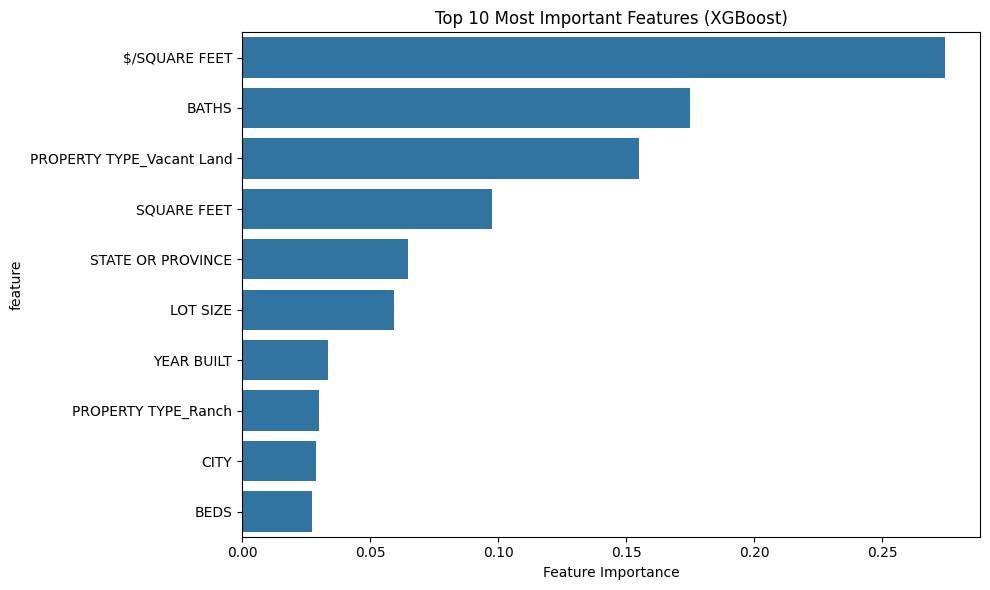


Model Comparison:
--------------------------------------------------
Random Forest MAE: $85,859.48
XGBoost MAE:      $70,816.38
Improvement:      $15,043.10


In [ ]:
# Define the parameter distributions for XGBoost
xgb_param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),  # also known as eta
    'subsample': uniform(0.5, 0.5),       # fraction of samples used for training trees
    'colsample_bytree': uniform(0.5, 0.5),# fraction of features used for training trees
    'min_child_weight': randint(1, 7),
    'gamma': uniform(0, 0.5),             # minimum loss reduction for partition
    'reg_alpha': uniform(0, 1),           # L1 regularization
    'reg_lambda': uniform(0, 1),          # L2 regularization
}

# Create base XGBoost model
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# Create RandomizedSearchCV object for XGBoost
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_distributions,
    n_iter=100,  # number of parameter settings that are sampled
    cv=5,        # 5-fold cross-validation
    random_state=42,
    n_jobs=-1,   # use all processors
    verbose=2,
    scoring='neg_mean_absolute_error'
)

# Fit RandomizedSearchCV
print("Starting XGBoost hyperparameter tuning...")
xgb_random.fit(X_train_scaled, y_train)

# Print results
print("\nBest parameters found:")
print(xgb_random.best_params_)
print("\nBest MAE score found:")
print(-xgb_random.best_score_)

# Use the best model for predictions
best_xgb = xgb_random.best_estimator_
xgb_preds = best_xgb.predict(X_test_scaled)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
print(f"\nTest set MAE with best model: ${xgb_mae:,.2f}")

# Feature importance for XGBoost
feature_importance_xgb = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_xgb.feature_importances_
})
feature_importance_xgb = feature_importance_xgb.sort_values('importance', ascending=False).head(10)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_xgb)
plt.title('Top 10 Most Important Features (XGBoost)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Compare MAE scores
print("\nModel Comparison:")
print("-" * 50)
print(f"Random Forest MAE: ${rf_mae:,.2f}")
print(f"XGBoost MAE:      ${xgb_mae:,.2f}")
print(f"Improvement:      ${(rf_mae - xgb_mae):,.2f}")

In [164]:
# Train Models with the best parameteres as determined by RandomSearchCV
lr = LinearRegression()
rf = RandomForestRegressor(
    n_estimators = 459, 
    max_depth = 96, 
    max_features = None, 
    max_leaf_nodes = 84, 
    min_samples_leaf = 8, 
    min_samples_split = 5, 
    bootstrap = True, 
    random_state = 42
    )

xgb = XGBRegressor(
    random_state=42, 
    colsample_bytree = 0.95, 
    gamma = 0.312, 
    learning_rate = 0.18, 
    max_depth = 9, 
    min_child_weight = 1, 
    reg_alpha = 0.355, 
    reg_lambda = 0.39, 
    subsample = 0.766, 
    )


## Model Evaluation and Comparison
Let's analyze how each model performs in detail:
1. Compare prediction distributions
2. Analyze error metrics for each model
3. Visualize actual vs predicted values
4. Look at error distributions
5. Identify where each model performs best/worst

In [1]:
# Create dictionary of models
models = {
    'Linear Regression': lr,
    'Random Forest': rf,
    'XGBoost': xgb
}

# Train models and make predictions
predictions = {}
mae_scores = {}
r2_scores = {}

for name, model in models.items():
    # Train model
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    pred = model.predict(X_test_scaled)
    predictions[name] = pred
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, pred)
    mae_scores[name] = mae
    r2 = r2_score(y_test, pred)
    r2_scores[name] = r2
    
    print(f"{name}:")
    print(f"MAE: ${mae:,.2f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 50)

# Create DataFrame with all predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': predictions['Linear Regression'],
    'Random Forest': predictions['Random Forest'],
    'XGBoost': predictions['XGBoost']
})

# Calculate error metrics for each model
for model in ['Linear Regression', 'Random Forest', 'XGBoost']:
    predictions_df[f'{model} Error'] = predictions_df['Actual'] - predictions_df[model]
    predictions_df[f'{model} Abs Error'] = abs(predictions_df[f'{model} Error'])
    predictions_df[f'{model} Percent Error'] = (predictions_df[f'{model} Error'] / predictions_df['Actual']) * 100

# Display summary statistics
print("\nSummary Statistics for Each Model:")
print("-" * 50)
for model in ['Linear Regression', 'Random Forest', 'XGBoost']:
    print(f"\n{model}:")
    print(f"Mean Absolute Error: ${predictions_df[f'{model} Abs Error'].mean():,.2f}")
    print(f"Median Absolute Error: ${predictions_df[f'{model} Abs Error'].median():,.2f}")
    print(f"Mean Percent Error: {predictions_df[f'{model} Percent Error'].mean():,.2f}%")
    print(f"Standard Deviation of Error: ${predictions_df[f'{model} Error'].std():,.2f}")

# Create visualizations
plt.figure(figsize=(15, 5))

# 1. Prediction Distribution
plt.subplot(131)
for model in ['Linear Regression', 'Random Forest', 'XGBoost']:
    sns.kdeplot(predictions_df[model], label=model)
sns.kdeplot(predictions_df['Actual'], label='Actual', linestyle='--')
plt.title('Prediction Distributions')
plt.xlabel('Price ($)')
plt.legend()

# 2. Error Distribution
plt.subplot(132)
for model in ['Linear Regression', 'Random Forest', 'XGBoost']:
    sns.kdeplot(predictions_df[f'{model} Error'], label=model)
plt.title('Error Distributions')
plt.xlabel('Error ($)')
plt.legend()

# 3. Absolute Error Comparison
plt.subplot(133)
error_data = [predictions_df[f'{model} Abs Error'] for model in ['Linear Regression', 'Random Forest', 'XGBoost']]
plt.boxplot(error_data, labels=['Linear Regression', 'Random Forest', 'XGBoost'])
plt.title('Absolute Error Comparison')
plt.ylabel('Absolute Error ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Scatter plots of predicted vs actual values
plt.figure(figsize=(15, 5))
for i, model in enumerate(['Linear Regression', 'Random Forest', 'XGBoost']):
    plt.subplot(1, 3, i+1)
    plt.scatter(predictions_df['Actual'], predictions_df[model], alpha=0.5)
    plt.plot([predictions_df['Actual'].min(), predictions_df['Actual'].max()], 
             [predictions_df['Actual'].min(), predictions_df['Actual'].max()], 
             'r--', lw=2)
    plt.title(f'{model}\nR² = {r2_scores[model]:.4f}')
    plt.xlabel('Actual Price ($)')
    plt.ylabel('Predicted Price ($)')

plt.tight_layout()
plt.show()

# Print extreme cases
print("\nExamples of Largest Prediction Errors:")
print("-" * 50)
for model in ['Linear Regression', 'Random Forest', 'XGBoost']:
    print(f"\n{model} - Top 5 Largest Errors:")
    worst_predictions = predictions_df.nlargest(5, f'{model} Abs Error')
    print(worst_predictions[['Actual', model, f'{model} Error', f'{model} Percent Error']])

NameError: name 'lr' is not defined